# Logistic Regression: Iris Dataset

## Análisis de la base de datos _"Iris"_

__Importando librerías__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

__Cargando la base de datos__

In [2]:
iris_df = pd.read_csv('datos/iris.csv')
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__Descripción de los datos por variedad de Iris__

In [5]:
iris_df.groupby('variety').aggregate(['mean', 'std', 'min', 'max'])

sepal_length                     sepal_width                      \
                   mean       std  min  max        mean       std  min  max   
variety                                                                       
Setosa            5.006  0.352490  4.3  5.8       3.428  0.379064  2.3  4.4   
Versicolor        5.936  0.516171  4.9  7.0       2.770  0.313798  2.0  3.4   
Virginica         6.588  0.635880  4.9  7.9       2.974  0.322497  2.2  3.8   

           petal_length                     petal_width                      
                   mean       std  min  max        mean       std  min  max  
variety                                                                      
Setosa            1.462  0.173664  1.0  1.9       0.246  0.105386  0.1  0.6  
Versicolor        4.260  0.469911  3.0  5.1       1.326  0.197753  1.0  1.8  
Virginica         5.552  0.551895  4.5  6.9       2.026  0.274650  1.4  2.5

### Exploración gráfica del dataset Iris

Se tienen un total de 50 datos por tipo de Iris.

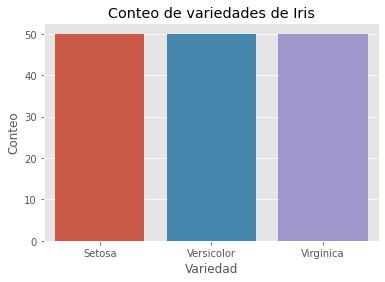

In [6]:
sns.countplot(x = 'variety',  
              data = iris_df)
plt.title('Conteo de variedades de Iris')
plt.xlabel('Variedad')
plt.ylabel('Conteo')
plt.show()

__Realizando las gráficas de disperción para los datos de sépalos y pétalos__

Con esto podemos observar que hay datos que se diferencian perfectamente de los demás, la _Setosa_ se encuentra separada de la _Sersicolor_ y la _Virginica_, mientas que estás últimas dos poseen características similares.

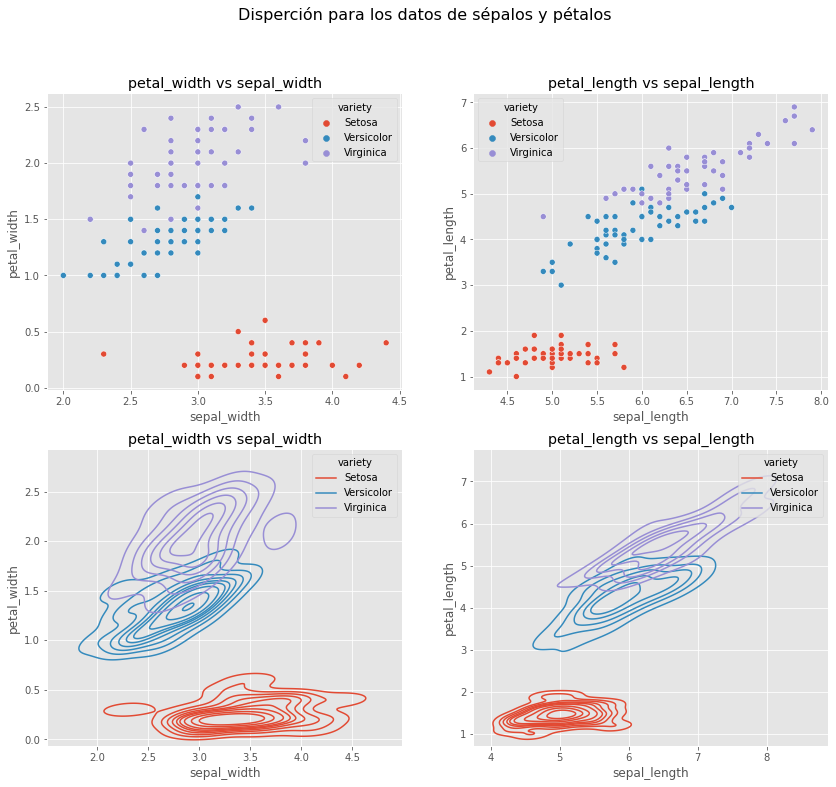

In [7]:
fig, axs = plt.subplots(2, 2, figsize = (14, 12))
fig.suptitle('Disperción para los datos de sépalos y pétalos', fontsize=16)

sns.scatterplot(ax = axs[0, 0], data=iris_df, y = 'petal_width', x = 'sepal_width', hue = "variety")
axs[0, 0].set_title('petal_width vs sepal_width')

sns.scatterplot(ax = axs[0, 1], data=iris_df, y = 'petal_length', x = 'sepal_length', hue = "variety")
axs[0, 1].set_title('petal_length vs sepal_length')

sns.kdeplot(ax = axs[1, 0], data=iris_df, y = 'petal_width', x = 'sepal_width', hue = "variety")
axs[1, 0].set_title('petal_width vs sepal_width')

sns.kdeplot(ax = axs[1, 1], data=iris_df, y = 'petal_length', x = 'sepal_length', hue = "variety")
axs[1, 1].set_title('petal_length vs sepal_length')

plt.show()

__Histogramas de los datos de pétalos y sépalos__

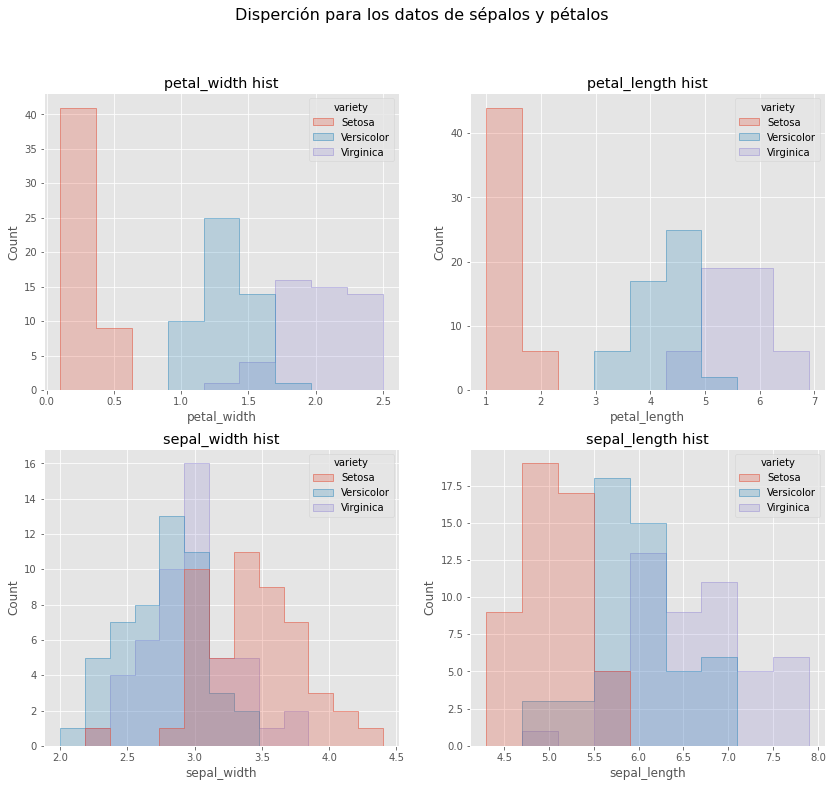

In [8]:
fig, axs = plt.subplots(2, 2, figsize = (14, 12))
fig.suptitle('Disperción para los datos de sépalos y pétalos', fontsize=16)

sns.histplot(ax = axs[0, 0], data=iris_df, x = 'petal_width', element="step", hue = "variety")
axs[0, 0].set_title('petal_width hist')

sns.histplot(ax = axs[0, 1], data=iris_df, x = 'petal_length', element="step", hue = "variety")
axs[0, 1].set_title('petal_length hist')

sns.histplot(ax = axs[1, 0], data=iris_df, x = 'sepal_width', element="step", hue = "variety")
axs[1, 0].set_title('sepal_width hist')

sns.histplot(ax = axs[1, 1], data=iris_df, x = 'sepal_length', element="step", hue = "variety")
axs[1, 1].set_title('sepal_length hist')

plt.show()

__Gráficos de caja para los datos de sépalos y pétalos__

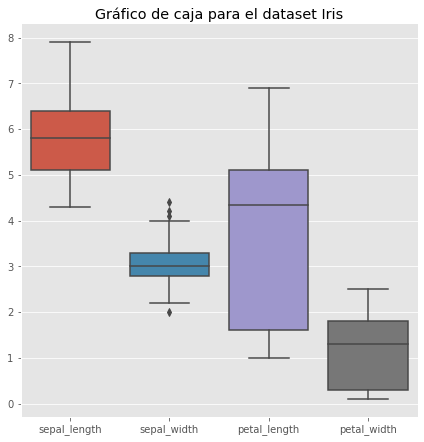

In [9]:
sns.catplot(kind = 'box', data = iris_df, height=6)
plt.title('Gráfico de caja para el dataset Iris')
plt.show()

### Features y Target

In [10]:
iris_df = pd.read_csv('datos/iris.csv')
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [11]:
variedad = []

for i in range(len(iris_df)):
    if iris_df['variety'].iloc[i] == 'Setosa':
        variedad.append(0)
    elif iris_df['variety'].iloc[i] == 'Versicolor':
        variedad.append(1)
    elif iris_df['variety'].iloc[i] == 'Virginica':
        variedad.append(2)

In [12]:
iris_df = pd.concat([iris_df, pd.Series(data=variedad, name = 'Variedad')], axis=1)

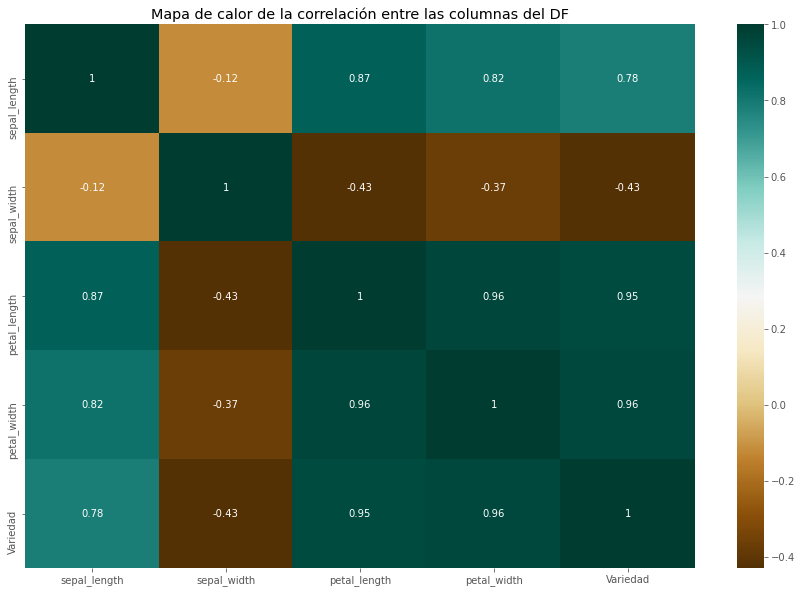

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(iris_df.corr(), cmap = 'BrBG', annot=True)
plt.title('Mapa de calor de la correlación entre las columnas del DF')
plt.show()

### Transformando las columnas con datos tipo object a valores de 0, 1 y 2

Dado que la base de datos utilizada presenta tres clases distintas, **Setosa**, **Versicolor** y **Virginica**, se le añadirá al dataframe creado una columna denominada target_value con su clasificación de clase correspondiente en valores enteros.

In [321]:
df = pd.read_csv('datos/iris.csv')

Se define una función para asignar el valor entero correspondiente al tipo de planta en cuestión; a las de tipo Setosa se les asigna un 0, a las de tipo Versicolor, un 1, y finalmente a las de tipo Virginica, se les asigna un 2

In [322]:
def change(x):
    if (x == "Setosa"):
        return 0
    if (x == "Versicolor"):
        return 1
    if (x == "Virginica"):
        return 2

Se aplica la función a la columna existente **variety** y se crea la columna **target_values**, notese que la columna se crea justo al lado de variety

In [323]:
df['target_values'] = df['variety'].apply(change)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,variety,target_values
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0


Se verifica que en efecto se encuentran las tres clases distintas en el dataframe

In [324]:
df["target_values"].unique().tolist()

[0, 1, 2]

### Definición de los features y creación de los dataframes X y Y

En este caso se procederá a utilizar las cuatro columnas, sepal_length, sepal_width, petal_length y petal_width para el desarrollo del modelo, estas se asignan a una variable X, y los valores de los target dada su variedad correspondiente o tipo de planta se asignan a la variable Y.

In [325]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df[['target_values']]

In [326]:
X.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [327]:
Y.head(5)

,target_values
0,0
1,0
2,0
3,0
4,0


### Normalizando los datos

Si bien los datos no presentan una dispersión alta y la media de valores es bastante consistente con los valores máximos y mínimos podría no ser necesario normalizar los datos, no obstante con el propósito de llevar a cabo la buena práctica de normalizar los valores se procederá con ello.

In [328]:
def min_max(df):
    import pandas as pd
    df_min = df.min()
    df_max = df.max()
    df_norm = (df - df_min) / (df_max - df_min)
    df_norm = pd.DataFrame(df_norm)
    return df_norm, df_min, df_max

def denormalize(x_norm, min_x, max_x):
    x = x_norm * (max_x - min_x) + min_x
    return x

In [329]:
X_norm, x_min, x_max = min_max(X)

In [23]:
len(df["target_values"] )

150

## One Vs All

En este método se creará un modelo por cada clase existente en los datos, por ello se tendrán 3 modelos en este caso, los cuales son cada uno, casos binarios de la clase en cuestión contra el resto de clases restantes, es decir, un primer modelo basado en la clase 1 vs el resto de clases, en donde todos aquellos objetos de la clase 1 se clasifican como 1 y todo los que no son de dicha clase, como 0.

De esta misma forma se generá un modelo basado en la clase 2 vs el resto de clases que no son de la clase 2, y finalmente, se repite el proceso para la clase 3. Esto se lográ creando arreglos enteros donde se asignan 0 y 1 de forma adecuada con la ayuda de la indexación.

La decisión de cuál modelo de los tres entrenados tiene la respuesta correcta en este caso, se hará al comparar las probabilidades de que determinada muestra pertenezca a cada una de las clases, tomando como resultado o predicción aquella que posea la mayor probabilidad.

In [24]:
from regression_implementations import ova_gradient_descent

El primer paso para la implementación del One Vs All o One vs Rest es importar el archivo python de nombre regression_implementations.py donde se halla la función creada para llevar a cabo las clasificación tipo One Vs All (OvA) para este ejemplo de la base de datos Flores Iris.

In [25]:
percent = 10
epochs = 10000
eta = 0.5
theta, test_index, train_index, Y_predict, J_log, Prob, Y_test = ova_gradient_descent(X_norm, Y, eta, epochs, percent)

Se uitilizan una variable denominada percent, la cual se encarga de apartar un determinado porcentaje del total de muestras X para utilizar para la etapa de validación o Test. En este caso se harán un total de **10000 iteraciones** con una **eta = 0.5**.

In [26]:
print(f'Numero de datos utilizados para el test: {len(test_index)}')
print(f'Numero de datos utilizados para el entrenamiento: {len(train_index)}')

Numero de datos utilizados para el test: 15
Numero de datos utilizados para el entrenamiento: 135


Se muestra las clasificaciones realizadas con el modelo a los datos de Test, y su correspondiente clasificación real para comparar la predicción hecha.

In [27]:
np.c_[Y_predict, Y_test]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 2],
       [2, 2]], dtype=int64)

Se muestran las 5 thetas obtenidas de los 3 modelos generados:

In [28]:
theta

array([[[  4.35754864],
        [ -3.60779387],
        [  6.66289555],
        [-11.18828911],
        [-10.565214  ]],

       [[  1.8853917 ],
        [ -0.21712549],
        [ -7.03282466],
        [  4.71936489],
        [ -4.34185189]],

       [[-18.2528918 ],
        [ -2.00803309],
        [ -5.7356342 ],
        [ 15.21822579],
        [ 17.63298016]]])

Se muestra la matriz de confusión de la clasifiación predicha y su clasifiación real, para ello se hace uso de la librería de sklearn para la obtención de dicha matriz, y se recurre a dos variables **ytrain** y **ytest** las cuales tienen indexados los target usados en el Test.

In [29]:
ytrain=df.iloc[train_index, :]["target_values"]
ytest=df.iloc[test_index, :]["target_values"]

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm0 = confusion_matrix(Y_predict, ytest)
cm0

array([[4, 0, 0],
       [0, 9, 0],
       [0, 0, 2]], dtype=int64)

Como puede observarse no hubo falsos negativos o positivos en los resultados, esto puede deberse a que se validó contra una cantidad considerablemente pequeña de datos, podría aumentarse esta cantidad, sin embargo de aumentar el porcentaje usado para los datos de Test se podría terminar teniendo modelos con pocos set de datos de entrenamiento, debido a que en total hay 150 muestras, perteneciendo a cada clase solo 50 muestras.

También se debe tomar en cuenta que la decisión de clasificación se toma basandosé en los resultados de tres modelos generados, por ello también se muestra acontinuación la matriz de confusión generada de cada uno de los tres modelos.

In [32]:
y0 = (ytest==0).astype(np.int32)
y1 = (ytest==1).astype(np.int32)
y2 = (ytest==2).astype(np.int32)

Se crean estas variables con ayuda de los valores de target usados para la validación con el fin  de tener los valores reales de target para comparar en la matriz de confusión.

Podemos observar la matriz de confusión generada para los datos de validación usando el modelo de la clase 0 vs el resto de clases.

Para ello se utiliza la variable Prob, la cual almacena las probabilidades correspondientes de la clase 0, 1 o 2.

In [33]:
cm1 = confusion_matrix(y0, Prob[:, 0].round(0))
cm1

array([[11,  0],
       [ 0,  4]], dtype=int64)

In [34]:
cm2 = confusion_matrix(y1, Prob[:, 1].round(0))
cm2

array([[5, 1],
       [5, 4]], dtype=int64)

In [35]:
cm3 = confusion_matrix(y2, Prob[:, 2].round(0))
cm3

array([[13,  0],
       [ 0,  2]], dtype=int64)

## One Vs One

En este tipo de clasificación se crearán tantos modelos como combinaciones de clasifiaciones binarias de clases exista, es decir, si en el método se One Vs All se comparaba las muestras pertenecientes a determinada clase vs las muestras del resto de clases, en este se comparan las muestras de determinada clase vs las muestras de otra clase en especifíco.

Para fines de nuestro problemas a resolver con la base de datos Flores Iris, se procederá a entrenar tres modelos distintos, esto debido a que se compararan las clases 0 con la 1, la 0 con la 2 y la 1 con la 2, cubriendo de esta forma todas las combinaciones posibles para este problema con tres clases.

La decisión de a cuál clase pertenece determinada muestra será tomada al generar la probabilidad de cada uno de los tres modelos, y observando en cada uno que probabilidad de ser de determinada clase es mayor, y basándose en la clase cuya probabilidad de ser la de la muestra se repita más, será la asignada.

In [36]:
from regression_implementations import ovo_gradient_descent

El primer paso para la implementación del One Vs AOne es importar el archivo python de nombre regression_implementations.py donde se halla la función creada para llevar a cabo las clasificación tipo One Vs One (OvO) para este ejemplo de la base de datos Flores Iris.

In [37]:
percent = 10
epochs = 10000
eta = 0.5
theta, test_index, train_index, Y_predict, J_log, Prob, Y_test, Y_c = ovo_gradient_descent(X_norm, Y, eta, epochs, percent)

Se uitilizan una variable denominada percent, la cual se encarga de apartar un determinado porcentaje del total de muestras X para utilizar para la etapa de validación o Test. En este caso se harán un total de **10000 iteraciones** con una **eta = 0.5**.

In [38]:
print(f'Numero de datos utilizados para el test: {len(test_index)}')
print(f'Numero de datos utilizados para el entrenamiento: {len(train_index)}')

Numero de datos utilizados para el test: 15
Numero de datos utilizados para el entrenamiento: 135


Se muestra las clasificaciones realizadas con el modelo a los datos de Test, y su correspondiente clasificación real para comparar la predicción hecha.

In [39]:
np.c_[Y_predict, Y_test]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.]])

Se muestran las 5 thetas obtenidas de los 3 modelos generados:

In [40]:
theta

array([[[  3.73830042],
        [ -3.99309372],
        [  7.84166441],
        [-10.66105675],
        [-10.19079133]],

       [[  5.34708241],
        [ -2.73009448],
        [  4.88445227],
        [ -8.7992622 ],
        [ -7.87084243]],

       [[ 17.83297469],
        [  2.09059669],
        [  6.05086082],
        [-14.32798483],
        [-18.03238778]]])

Se muestra la matriz de confusión de la clasifiación predicha y su clasifiación real, para ello se hace uso de la librería de sklearn para la obtención de dicha matriz, y se recurre a dos variables **ytrain** y **ytest** las cuales tienen indexados los target usados en el Test.

In [41]:
ytrain=df.iloc[train_index, :]["target_values"]
ytest=df.iloc[test_index, :]["target_values"]

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm0 = confusion_matrix(Y_predict, ytest)
cm0

array([[3, 0, 0],
       [0, 4, 0],
       [0, 0, 8]], dtype=int64)

In [44]:
y0 = (ytest==0).astype(np.int32)
y1 = (ytest==1).astype(np.int32)
y2 = (ytest==2).astype(np.int32)

In [45]:
cm0 = confusion_matrix(y0, Prob[:,0].round(0))
cm0

array([[12,  0],
       [ 0,  3]], dtype=int64)

In [46]:
cm1 = confusion_matrix(y0, Prob[:,1].round(0))
cm1

array([[12,  0],
       [ 0,  3]], dtype=int64)

In [47]:
cm2 = confusion_matrix(y1, Prob[:,2].round(0))
cm2

array([[8, 3],
       [0, 4]], dtype=int64)

## Softmax Regression

Este algoritmo es una generalización del Logistic Regression que permite trabajar con más que solo clase binarias, es decir, nos permite utilizar más clases para realizar el entrenamiento.

In [297]:
import random
from sklearn.preprocessing import StandardScaler
#percent = 10
#m = len(X)
#test_index = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
#train_index = list(np.arange(0, m))
    
#for element in test_index:
    #train_index.remove(element)
#X_train = X_norm.iloc[train_index]
#X_test = X_norm.iloc[test_index]
#Y_train = np.c_[Y.iloc[train_index]]
#Y_test = np.c_[Y.iloc[test_index]]

In [330]:
y_1 = np.c_[(np.ones(50),np.zeros(50), np.zeros(50))]
y_2 = np.c_[(np.zeros(50),np.ones(50), np.zeros(50))]
y_3 = np.c_[(np.zeros(50),np.zeros(50), np.ones(50))]
y_c = (np.append([[y_1],[y_2]],[[y_3]], axis=0)).reshape(150,3)

In [331]:
y_c.shape

(150, 3)

In [332]:
#m = len(X_train)
#X_b_pre = np.c_[np.ones((m, 1)), X_train]
#scaler = StandardScaler()
#X_b= scaler.fit_transform(X_b_pre)

In [333]:
m = len(X)
X_b_pre = np.c_[np.ones((m, 1)), X]
scaler = StandardScaler()
X_b= scaler.fit_transform(X_b_pre)

In [334]:
X_b

array([[ 0.00000000e+00, -9.00681170e-01,  1.01900435e+00,
        -1.34022653e+00, -1.31544430e+00],
       [ 0.00000000e+00, -1.14301691e+00, -1.31979479e-01,
        -1.34022653e+00, -1.31544430e+00],
       [ 0.00000000e+00, -1.38535265e+00,  3.28414053e-01,
        -1.39706395e+00, -1.31544430e+00],
       [ 0.00000000e+00, -1.50652052e+00,  9.82172869e-02,
        -1.28338910e+00, -1.31544430e+00],
       [ 0.00000000e+00, -1.02184904e+00,  1.24920112e+00,
        -1.34022653e+00, -1.31544430e+00],
       [ 0.00000000e+00, -5.37177559e-01,  1.93979142e+00,
        -1.16971425e+00, -1.05217993e+00],
       [ 0.00000000e+00, -1.50652052e+00,  7.88807586e-01,
        -1.34022653e+00, -1.18381211e+00],
       [ 0.00000000e+00, -1.02184904e+00,  7.88807586e-01,
        -1.28338910e+00, -1.31544430e+00],
       [ 0.00000000e+00, -1.74885626e+00, -3.62176246e-01,
        -1.34022653e+00, -1.31544430e+00],
       [ 0.00000000e+00, -1.14301691e+00,  9.82172869e-02,
        -1.28338910e+00

In [335]:
epochs = 100000
eta = 0.2

In [336]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

In [337]:
def Cost(a, b):
    return np.mean(- np.sum(np.log(a)*(b), axis=1))

In [338]:
theta = np.random.randn(5,3)

In [339]:
for i in range(epochs):
    theta = theta - eta*(X_b.T @ (softmax(X_b @ theta) - y_c))
    J_cost = Cost(softmax(X_b @ theta), y_c)

In [340]:
theta

array([[  1.36333285,  -1.30480351,  -1.36376467],
       [ -9.71676482,   0.41603125,  10.99071479],
       [ 21.45343115, -10.20322911, -10.87323575],
       [-20.52039267,   6.50176294,  12.34550975],
       [-19.32041924,   2.27532413,  21.67730828]])

In [342]:
y_predict =  np.argmax(softmax(X_b @ theta), axis = -1).reshape(-1,1)
np.c_[y_predict, Y]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [1, 1],
       [2, 1],
       [1, 1],
       [1, 1],
       [2, 1],
       [1, 1],
       [2, 1],
       [1, 1],
       [2, 1],
       [2,

In [341]:
cm0 = confusion_matrix(y_predict, Y)
cm0

array([[50,  0,  0],
       [ 0, 42, 23],
       [ 0,  8, 27]], dtype=int64)